In [1]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set visualization style
sns.set(style="whitegrid")
plt.style.use('fivethirtyeight')

In [2]:
# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

# Display the first few rows
print("Training Data:")
print(train_df.head())
print("\nTest Data:")
print(test_df.head())

Training Data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

In [3]:
# Get basic information about the dataset
print("Training Data Info:")
print(train_df.info())

# Get statistical summary
print("\nStatistical Summary:")
print(train_df.describe())

# Check for missing values
print("\nMissing Values in Training Data:")
print(train_df.isnull().sum())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Statistical Summary:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118   

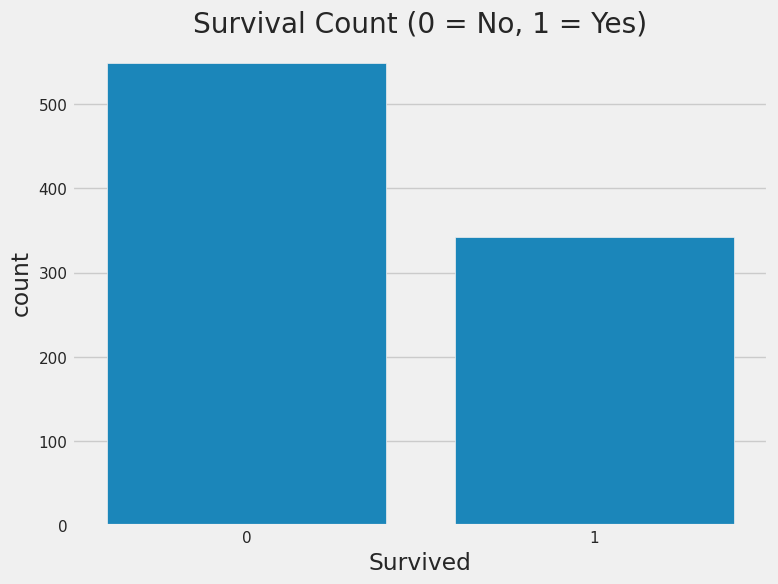

In [4]:
# Visualize survival count
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

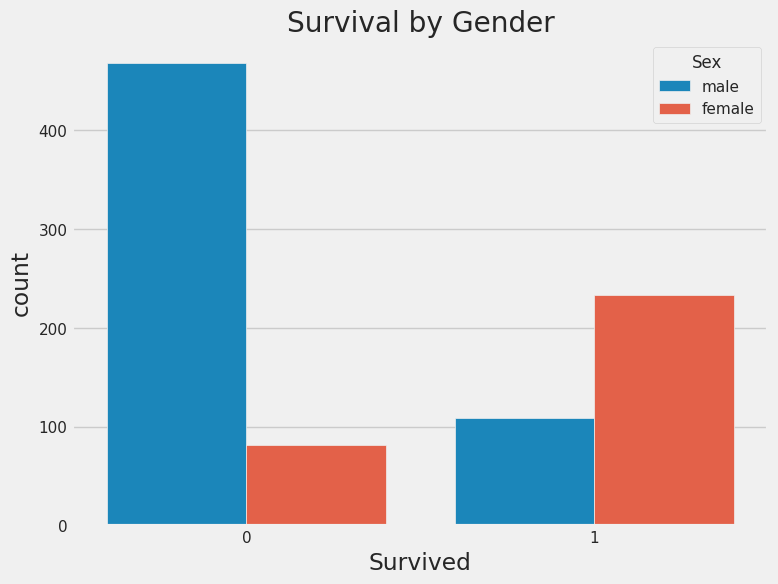

In [5]:

# Visualize survival by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.title('Survival by Gender')
plt.show()

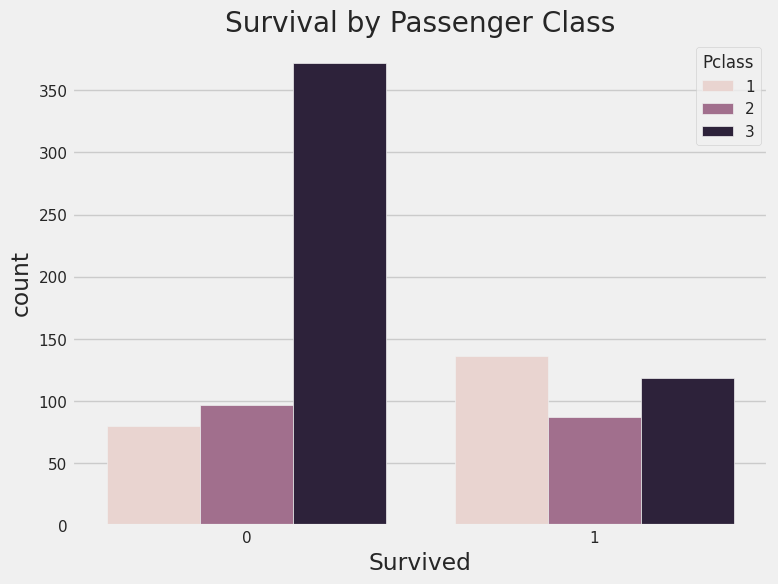

In [6]:
# Visualize survival by passenger class
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Pclass', data=train_df)
plt.title('Survival by Passenger Class')
plt.show()

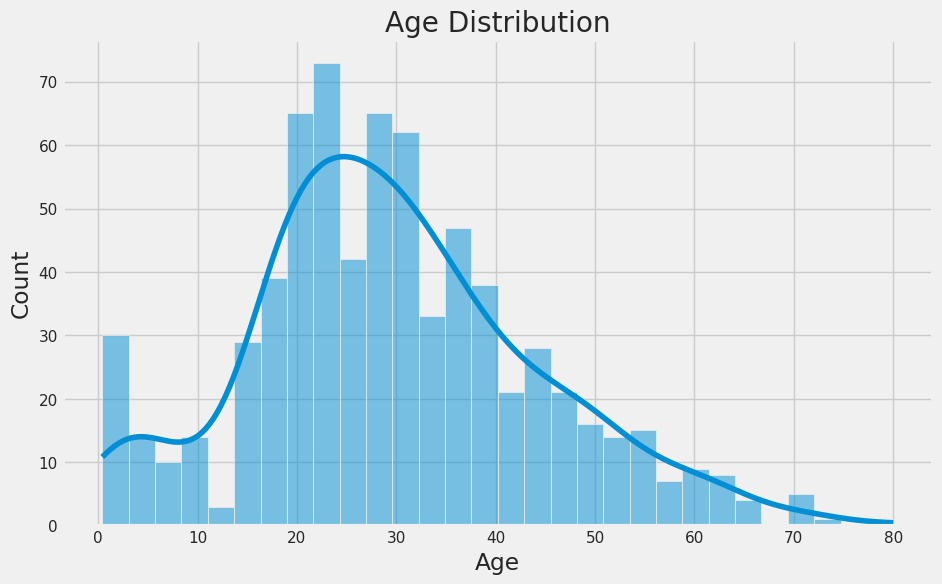

In [7]:

# Visualize age distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

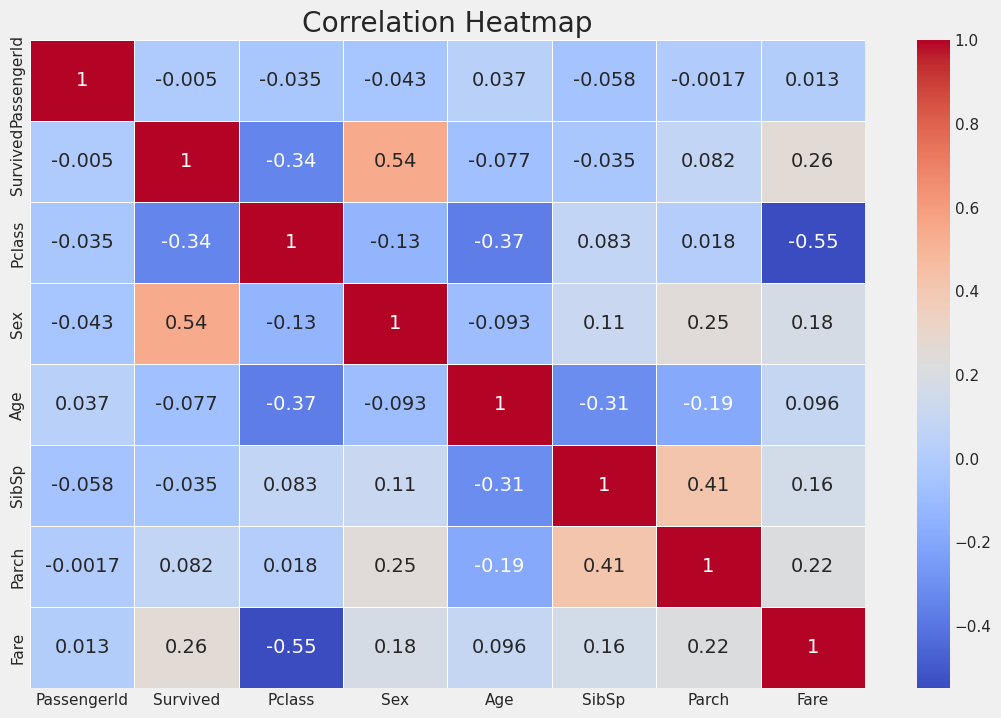

In [8]:
# Create a correlation heatmap
plt.figure(figsize=(12, 8))
# Convert categorical variables to numeric for correlation
corr_df = train_df.copy()
corr_df['Sex'] = corr_df['Sex'].map({'male': 0, 'female': 1})
# Select only numeric columns
numeric_cols = corr_df.select_dtypes(include=[np.number]).columns
sns.heatmap(corr_df[numeric_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [9]:

def preprocess_data(df):
    df = df.copy()
    df['Age'] = df['Age'].fillna(df['Age'].median())
    
    if 'Fare' in df.columns:
        df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    
    if 'Embarked' in df.columns:
        df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    
    df['HasCabin'] = df['Cabin'].notna().astype(int)
    df = df.drop('Cabin', axis=1)

    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
    
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    if 'Embarked' in df.columns:
        embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
        df = pd.concat([df, embarked_dummies], axis=1)
        df = df.drop('Embarked', axis=1)
    
    return df

train_processed = preprocess_data(train_df)
test_processed = preprocess_data(test_df)

print("\nMissing Values After Cleaning (Training Data):")
print(train_processed.isnull().sum())
print("\nMissing Values After Cleaning (Test Data):")
print(test_processed.isnull().sum())


Missing Values After Cleaning (Training Data):
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
HasCabin       0
FamilySize     0
IsAlone        0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

Missing Values After Cleaning (Test Data):
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
HasCabin       0
FamilySize     0
IsAlone        0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [10]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'HasCabin', 'FamilySize', 'IsAlone', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
X_train = train_processed[features]
y_train = train_processed['Survived']
X_test = test_processed[features]

print("\nPreprocessed Training Data:")
print(X_train.head())
print("\nPreprocessed Test Data:")
print(X_test.head())


Preprocessed Training Data:
   Pclass  Sex   Age  SibSp  Parch     Fare  HasCabin  FamilySize  IsAlone  \
0       3    0  22.0      1      0   7.2500         0           2        0   
1       1    1  38.0      1      0  71.2833         1           2        0   
2       3    1  26.0      0      0   7.9250         0           1        1   
3       1    1  35.0      1      0  53.1000         1           2        0   
4       3    0  35.0      0      0   8.0500         0           1        1   

   Embarked_C  Embarked_Q  Embarked_S  
0       False       False        True  
1        True       False       False  
2       False       False        True  
3       False       False        True  
4       False       False        True  

Preprocessed Test Data:
   Pclass  Sex   Age  SibSp  Parch     Fare  HasCabin  FamilySize  IsAlone  \
0       3    0  34.5      0      0   7.8292         0           1        1   
1       3    1  47.0      1      0   7.0000         0           2        0   
2  

In [12]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_split, y_train_split)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'



Model Accuracy on Validation Set: 0.8045


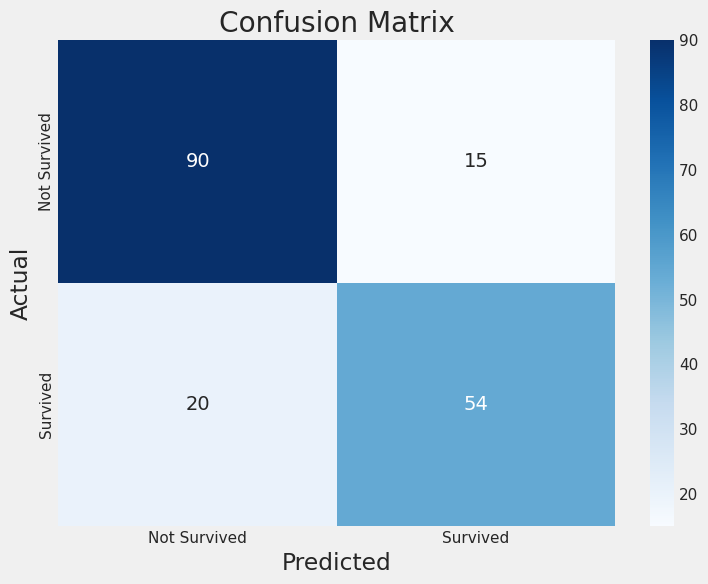


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [13]:
# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"\nModel Accuracy on Validation Set: {accuracy:.4f}")

# Display confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

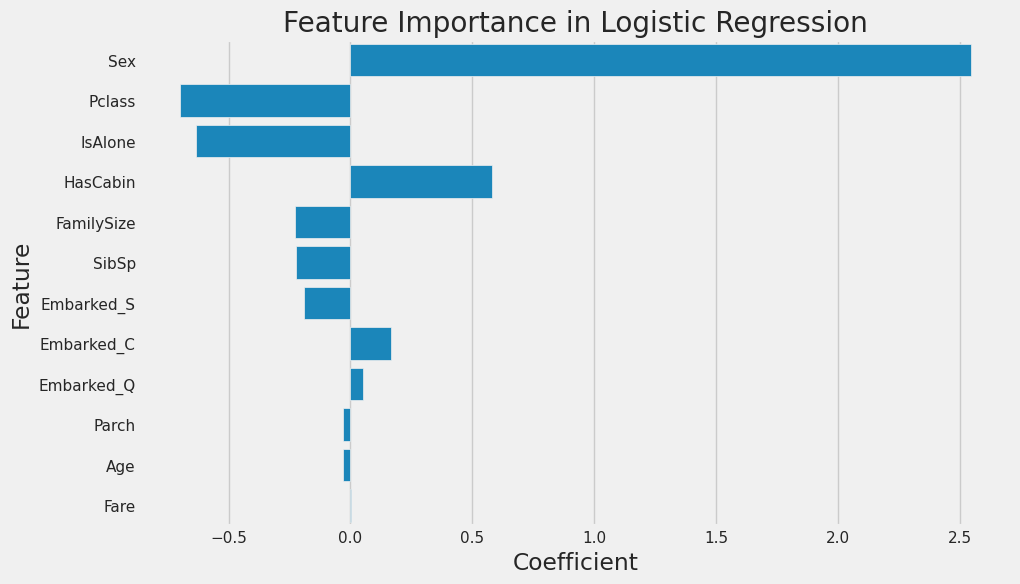


Feature Importance:
       Feature  Coefficient  Abs_Coefficient
1          Sex     2.546235         2.546235
0       Pclass    -0.698622         0.698622
8      IsAlone    -0.635728         0.635728
6     HasCabin     0.580082         0.580082
7   FamilySize    -0.227545         0.227545
3        SibSp    -0.224319         0.224319
11  Embarked_S    -0.191550         0.191550
9   Embarked_C     0.167944         0.167944
10  Embarked_Q     0.051350         0.051350
4        Parch    -0.030971         0.030971
2          Age    -0.030190         0.030190
5         Fare     0.001711         0.001711


In [14]:
# Display feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
})
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance in Logistic Regression')
plt.show()

print("\nFeature Importance:")
print(feature_importance)

In [15]:
# Make predictions on the test set
test_predictions = model.predict(X_test)

# Create a submission dataframe
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_predictions
})

# Display the first few rows of the submission
print("\nSubmission File:")
print(submission.head())


Submission File:
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [16]:
# Save the submission file
submission.to_csv('titanic_submission.csv', index=False)
print("\nSubmission file saved as 'titanic_submission.csv'")


Submission file saved as 'titanic_submission.csv'


In [17]:
# Compare our predictions with the gender submission example
comparison = pd.merge(
    submission, 
    gender_submission, 
    on='PassengerId', 
    suffixes=('_our', '_gender')
)

# Calculate agreement rate
agreement = (comparison['Survived_our'] == comparison['Survived_gender']).mean()
print(f"\nAgreement with gender submission: {agreement:.2%}")

# Display differences
differences = comparison[comparison['Survived_our'] != comparison['Survived_gender']]
print(f"\nNumber of differences: {len(differences)}")
print("\nFirst 10 differences:")
print(differences.head(10))


Agreement with gender submission: 95.45%

Number of differences: 19

First 10 differences:
     PassengerId  Survived_our  Survived_gender
23           915             1                0
32           924             0                1
34           926             1                0
50           942             1                0
64           956             1                0
68           960             1                0
73           965             1                0
75           967             1                0
118         1010             1                0
140         1032             0                1
